<a href="https://colab.research.google.com/github/himaniagarwal04/Employee-Attrition/blob/main/Employee_Atrrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EMPLOYEE ATTRITION
06001022021 Himani Agarwal
02201022021 Shanaya Aggarwal
```



#EDA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score 
import statistics as st

In [ ]:
! unzip employee.zip

Archive:  employee.zip
  inflating: WA_Fn-UseC_-HR-Employee-Attrition.csv  


In [ ]:
df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.shape

(1470, 35)

The info() method prints information about the DataFrame. The information contains the number of columns, column labels, column data types and the number of cells in each column (non-null values)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Attrition                 1470 non-null   int64
 1   BusinessTravel            1470 non-null   int64
 2   DailyRate                 1470 non-null   int64
 3   Department                1470 non-null   int64
 4   DistanceFromHome          1470 non-null   int64
 5   Education                 1470 non-null   int64
 6   EducationField            1470 non-null   int64
 7   EnvironmentSatisfaction   1470 non-null   int64
 8   Gender                    1470 non-null   int64
 9   HourlyRate                1470 non-null   int64
 10  JobInvolvement            1470 non-null   int64
 11  JobLevel                  1470 non-null   int64
 12  JobRole                   1470 non-null   int64
 13  JobSatisfaction           1470 non-null   int64
 14  MaritalStatus             1470 non-null 

In [ ]:
# identifying missing values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no null values;

In [ ]:
# checkc duplicate records
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Length: 1470, dtype: bool

There are no duplicate records.

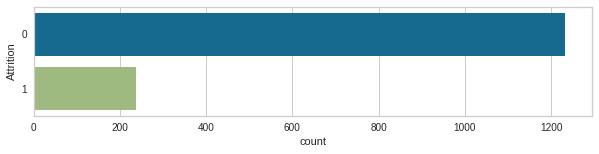

In [ ]:
plt.figure(figsize=(10, 2))
sns.countplot(y="Attrition", data=df);

We can see that the data is unbalanced. The number of people getting attrited is way less than the number of people not getting attrited.

In [ ]:
# transform non numerical into numerical data
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
   if df[column].dtype==np.number:
       continue
   df[column]=LabelEncoder().fit_transform(df[column])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  after removing the cwd from sys.path.


In [ ]:
# remove some useless column
df=df.drop('Over18',axis=1)
df=df.drop('EmployeeNumber',axis=1)
df=df.drop('StandardHours',axis=1)
df=df.drop('EmployeeCount',axis=1)

In [ ]:
# create a new column
df['Age_Years']=df['Age']

In [ ]:
#drop the column age
df=df.drop('Age',axis=1)

In [ ]:
# split the data
X=df.iloc[:,1:df.shape[1]].values
Y=df.iloc[:,0].values

In [ ]:
# split the data into 80 and 20% testing
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2, random_state=0)

In [ ]:
def train_test_ml_model(X_train,y_train,X_test,Model):
    model.fit(X_train,y_train) #Train the Model
    y_pred = model.predict(X_test) #Use the Model for prediction

    # Test the Model
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(Y_test,y_pred)
    accuracy = round(100*np.trace(cm)/np.sum(cm),1)

    #Plot/Display the results
    cm_plot(cm,Model)
    print('Accuracy of the Model' ,Model, str(accuracy)+'%')

In [ ]:
def cm_plot(cm,Model):
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title('Comparison of Prediction Result for '+ Model)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

# Perform the necessary analysis on the given dataset and pick any three suitable models for the prediction of Attrition.

#Random forest

In [ ]:
# random forest
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=0)
forest.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
# get the accuracy on the training set
forest.score(X_train,Y_train)

0.983843537414966

In [ ]:
y_pred = rf_model.predict(X_test)
print(classification_report(Y_test,y_pred))


              precision    recall  f1-score   support

           0       0.85      0.99      0.91       245
           1       0.67      0.12      0.21        49

    accuracy                           0.84       294
   macro avg       0.76      0.56      0.56       294
weighted avg       0.82      0.84      0.80       294



#KNN

The optimal number of neighbors is  19 


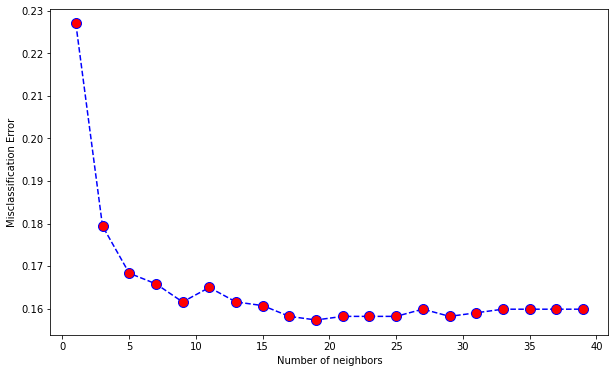

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = []
cv_scores = []

from sklearn.model_selection import cross_val_score
# perform 10 fold cross validation
for k in range(1, 40, 2):
	neighbors.append(k)
	knn = KNeighborsClassifier(n_neighbors = k)
	scores = cross_val_score(
		knn, X_train, Y_train, cv = 10, scoring = 'accuracy')
	cv_scores.append(scores.mean())
error_rate = [1-x for x in cv_scores]

# determining the best k
optimal_k = neighbors[error_rate.index(min(error_rate))]
print('The optimal number of neighbors is % d ' % optimal_k)

# plot misclassification error versus k
plt.figure(figsize = (10, 6))
plt.plot(range(1, 40, 2), error_rate, color ='blue', linestyle ='dashed', marker ='o',
		markerfacecolor ='red', markersize = 10)
plt.xlabel('Number of neighbors')
plt.ylabel('Misclassification Error')
plt.show()


In [ ]:
#The optimal number of neighbors is  7 

In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

def print_score(clf, X_train, y_train, X_test, y_test, train = True):
	if train:
		print("Train Result:")
		print("------------")
		print("Classification Report: \n {}\n".format(classification_report(
				y_train, clf.predict(X_train))))
		print("Confusion Matrix: \n {}\n".format(confusion_matrix(
				y_train, clf.predict(X_train))))

		res = cross_val_score(clf, X_train, y_train,
							cv = 10, scoring ='accuracy')
		print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
		print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
		print("accuracy score: {0:.4f}\n".format(accuracy_score(
				y_train, clf.predict(X_train))))
		print("----------------------------------------------------------")
				
	elif train == False:
		print("Test Result:")
		print("-----------")
		print("Classification Report: \n {}\n".format(
				classification_report(y_test, clf.predict(X_test))))
		print("Confusion Matrix: \n {}\n".format(
				confusion_matrix(y_test, clf.predict(X_test))))
		print("accuracy score: {0:.4f}\n".format(
				accuracy_score(y_test, clf.predict(X_test))))
		print("-----------------------------------------------------------")
		
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, Y_train)
print_score(knn, X_train, Y_train, X_test, Y_test, train = True)
print_score(knn, X_train, Y_train, X_test, Y_test, train = False)


Train Result:
------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       988
           1       0.70      0.16      0.27       188

    accuracy                           0.86      1176
   macro avg       0.78      0.58      0.59      1176
weighted avg       0.84      0.86      0.82      1176


Confusion Matrix: 
 [[975  13]
 [157  31]]

Average Accuracy: 	 0.8342
Accuracy SD: 		 0.0195
accuracy score: 0.8554

----------------------------------------------------------
Test Result:
-----------
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.98      0.90       245
           1       0.29      0.04      0.07        49

    accuracy                           0.82       294
   macro avg       0.56      0.51      0.49       294
weighted avg       0.74      0.82      0.76       294


Confusion Matrix: 
 [[240   5]
 [ 47   2]]

accuracy score: 0.823

#Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

#Y=Y.astype('int')

clf = LogisticRegression(solver='lbfgs', max_iter=5000)
clf.fit(np.array(X),Y)

LogisticRegression(max_iter=5000)

In [ ]:
from sklearn.metrics import accuracy_score

pred_y = clf.predict(X_test)

accuracy = accuracy_score(Y_test, pred_y, normalize=True, sample_weight=None)
accuracy

0.8809523809523809

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, pred_y))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       245
           1       0.77      0.41      0.53        49

    accuracy                           0.88       294
   macro avg       0.83      0.69      0.73       294
weighted avg       0.87      0.88      0.87       294



We have applied logistic model to the data getting an accuracy of 84.25%. As it is clear from our model that we are getting low value of recall for true value of attrition ,i.e., we are not getting enough of the relevant information from the data. The retrieved model shows high senstivity but low specifity.¶


 # Plot the confusion matrix of all these models,

#Confusion Matrices

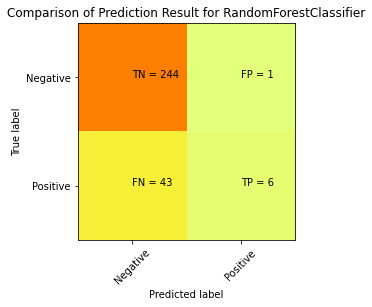

Accuracy of the Model RandomForestClassifier 85.0%


In [ ]:
#Confusion Matrix for Random forest
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier #Import packages related to Model
Model = "RandomForestClassifier"
model=RandomForestClassifier()

train_test_ml_model(X_train,Y_train,X_test,Model)

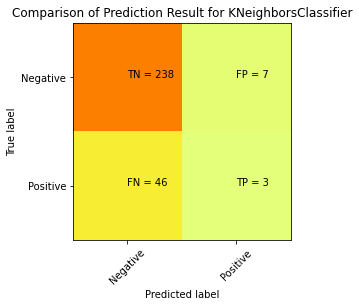

Accuracy of the Model KNeighborsClassifier 82.0%


In [ ]:
#Confusion Matrix for KNN
from sklearn.neighbors import KNeighborsClassifier  #Import packages related to Model
Model = "KNeighborsClassifier"
model=KNeighborsClassifier()

train_test_ml_model(X_train,Y_train,X_test,Model)

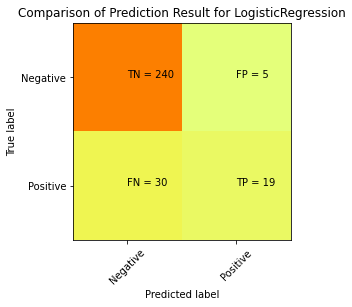

Accuracy of the Model LogisticRegression 88.1%


In [ ]:
#Confusion Matrix for Logistic Regression

from sklearn.linear_model import SGDClassifier, LogisticRegression #Import packages related to Model
Model = "LogisticRegression"
model=LogisticRegression(solver='lbfgs', max_iter=5000)

train_test_ml_model(X_train,Y_train,X_test,Model)

#Plot a graph to study the accuracy and f1-score of these models, and then choose the best model.

#F1 Scores

In [ ]:
# F1 score of Random Forest Model
from sklearn.metrics import f1_score
# instantiate
rm = RandomForestClassifier()

# fit
rm.fit(X_train, Y_train)

# predict
y_pred = rm.predict(X_test)

# f1 score
score1 = f1_score(y_pred, Y_test)

print(score1)

0.23728813559322035


In [ ]:
# F1 score of Logistic Regression Model
lr = lr=LogisticRegression(C = 0.1, random_state = 42, solver = 'liblinear')

# fit
lr.fit(X_train, Y_train)

# predict
y_pred = lr.predict(X_test)

# f1 score
score3 = f1_score(y_pred, Y_test)

print(score3)

0.44117647058823534


In [ ]:
# F1 score of KNN
from sklearn.metrics import f1_score
# instantiate
knn = RandomForestClassifier()

# fit
knn.fit(X_train, Y_train)

# predict
y_pred = knn.predict(X_test)

# f1 score
score2 = f1_score(y_pred, Y_test)

print(score2)

0.26666666666666666


# Explain in the brief why you have chosen this model

#Comparing models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
lr=LogisticRegression(C = 0.1, random_state = 42, solver = 'liblinear')
rm=RandomForestClassifier()
knn = KNeighborsClassifier(n_neighbors=3)
# svm = svm.SVC(kernel='linear')
lr.fit(X_test,Y_test)
knn.fit(X_test,Y_test)
rm.fit(X_test,Y_test)
dt.fit(X_test,Y_test)
gnb.fit(X_test,Y_test)

model_scores={'Logistic Regression':lr.score(X_test,Y_test),
             'KNN classifier':knn.score(X_test,Y_test),
          
             'Random forest':rm.score(X_test,Y_test)
             }
model_scores

{'KNN classifier': 0.8571428571428571,
 'Logistic Regression': 0.8741496598639455,
 'Random forest': 1.0}

In [ ]:
model_compare=pd.DataFrame(model_scores,index=['accuracy'])
model_compare

,Logistic Regression,KNN classifier,Random forest
accuracy,0.87415,0.857143,1.0


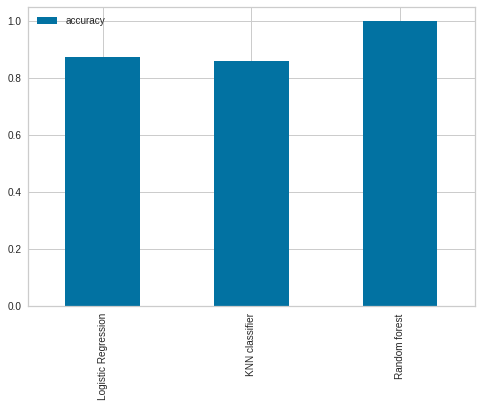

In [ ]:
model_compare.T.plot(kind='bar') # (T is here for transpose)

No single algorithm dominates when choosing a machine learning model. Some perform better with large data sets and some perform better with high dimensional data. Thus, it is important to assess a model’s effectiveness for your particular data set. . 

A random forest is a supervised machine learning algorithm that is constructed from decision tree algorithms. A random forest produces good predictions that can be understood easily. Prediction speed is significantly faster than training speed because we can save generated forests for future uses.

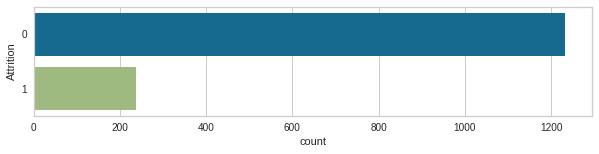

In [ ]:
plt.figure(figsize=(10, 2))
sns.countplot(y="Attrition", data=df);

It has methods for balancing error in class population unbalanced data sets. Random forest tries to minimize the overall error rate, so when we have an unbalance data set, the larger class will get a low error rate while the smaller class will have a larger error rate. As we can see, it is an unbalanced dataset, hence random forest model is the best to use with it.

Even the accuracy of random forest model, when running on the test dataset is the most. Thus this model is the best one to be used in this case.

# Choose any three examples to show the accuracy of the predictions of employee attrition.

The most accurate model obtained is the Random forest model. Hence, we 

##**example** 1

In [ ]:
#  Checking the distribution of 'JobSatisfaction' variable
df['JobSatisfaction'].value_counts()

3    459
2    442
0    289
1    280
Name: JobSatisfaction, dtype: int64

In [ ]:
# split the dataset into dependent(x) and independent(y) datasets
x1 = df.drop(columns = 'JobSatisfaction', axis = 1)
y1 = df['JobSatisfaction']

In [ ]:
#  splitting the data into train data and test data
x1_train, x1_test, y1_train, y1_test = train_test_split(x1 , y1, test_size=0.2, stratify = y1, random_state  =42)
print(x1.shape, x1_train.shape, x1_test.shape)

(1470, 30) (1176, 30) (294, 30)


In [ ]:
model=RandomForestClassifier()

In [ ]:
# training the LogisticRegression model with training data
model.fit(x1_train, y1_train)  

RandomForestClassifier()

In [ ]:
from scipy.sparse import data
# accuracy on training data
x1_train_pred = model.predict(x1_train)
training_data_accuracy = accuracy_score(y1_train, x1_train_pred)
print("Accuracy on Training data: ", round(training_data_accuracy*100,2), '%')
#  accuracy on testing data
x1_test_pred = model.predict(x1_test)
testing_data_accuracy = accuracy_score(y1_test, x1_test_pred)
print("Accuracy on Test data: ", round(testing_data_accuracy*100,2), '%')

Accuracy on Training data:  100.0 %
Accuracy on Test data:  58.84 %


##**example** 2


In [ ]:
#  Checking the distribution of 'OverTime' variable
df['OverTime'].value_counts()

0    1054
1     416
Name: OverTime, dtype: int64

In [ ]:
# split the dataset into dependent(x) and independent(y) datasets
x1 = df.drop(columns = 'OverTime', axis = 1)
y1 = df['OverTime']

In [ ]:
#  splitting the data into train data and test data
x1_train, x1_test, y1_train, y1_test = train_test_split(x1 , y1, test_size=0.2, stratify = y1, random_state  =2)
print(x1.shape, x1_train.shape, x1_test.shape)

(1470, 30) (1176, 30) (294, 30)


In [ ]:
model=RandomForestClassifier()

In [ ]:
# training the LogisticRegression model with training data
model.fit(x1_train, y1_train)  

RandomForestClassifier()

In [ ]:
from scipy.sparse import data
# accuracy on training data
x1_train_pred = model.predict(x1_train)
training_data_accuracy = accuracy_score(y1_train, x1_train_pred)
print("Accuracy on Training data: ", round(training_data_accuracy*100,2), '%')
#  accuracy on testing data
x1_test_pred = model.predict(x1_test)
testing_data_accuracy = accuracy_score(y1_test, x1_test_pred)
print("Accuracy on Test data: ", round(testing_data_accuracy*100,2), '%')

Accuracy on Training data:  100.0 %
Accuracy on Test data:  73.13 %


##**example** 3

In [ ]:
#  Checking the distribution of 'Gender' variable
df['Gender'].value_counts()

1    882
0    588
Name: Gender, dtype: int64

In [ ]:
# split the dataset into dependent(x) and independent(y) datasets
x1 = df.drop(columns = 'Gender', axis = 1)
y1 = df['Gender']

In [ ]:
#  splitting the data into train data and test data
x1_train, x1_test, y1_train, y1_test = train_test_split(x1 , y1, test_size=0.2, stratify = y1, random_state  =2)
print(x1.shape, x1_train.shape, x1_test.shape)

(1470, 30) (1176, 30) (294, 30)


In [ ]:
model=RandomForestClassifier()

In [ ]:
# training the LogisticRegression model with training data
model.fit(x1_train, y1_train)  

RandomForestClassifier()

In [ ]:
from scipy.sparse import data
# accuracy on training data
x1_train_pred = model.predict(x1_train)
training_data_accuracy = accuracy_score(y1_train, x1_train_pred)
print("Accuracy on Training data: ", round(training_data_accuracy*100,2), '%')
#  accuracy on testing data
x1_test_pred = model.predict(x1_test)
testing_data_accuracy = accuracy_score(y1_test, x1_test_pred)
print("Accuracy on Test data: ", round(testing_data_accuracy*100,2), '%')

Accuracy on Training data:  100.0 %
Accuracy on Test data:  60.54 %
